In [1]:
library(tidyverse)
library(pheatmap)
library(ggplot2)
library(reshape2)
library(gplots)
#
options(digits=15)

── Attaching core tidyverse packages ──────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [2]:
keep <- c(1,3,4,5)
cols <- c("Motif_Name", "p_value", "Log_p", "q_value")
#
Male_OC <- read.delim(file = 'homer/Male_OC/knownResults.txt', header = T, sep = "\t")
Male_OC <- Male_OC[,keep]
colnames(Male_OC) <- cols
Male_OC$log10 <- -log10(Male_OC$p_value)
Male_OC$log10 <- ifelse(Male_OC$log10 == Inf, "300", Male_OC$log10)
Male_OC$Condition <- c("OC")
Male_OC$Sex <- c("Male")
Male_OC$log10 <- as.numeric(Male_OC$log10)
Male_OC_tops <- Male_OC[1:10,]$Motif_Name

nrow(Male_OC)
#
Male_CO <- read.delim(file = 'homer/Male_CO/knownResults.txt', header = T, sep = "\t", dec = )
Male_CO <- Male_CO[,keep]
colnames(Male_CO) <- cols
Male_CO$log10 <- -log10(Male_CO$p_value)
Male_CO$log10 <- ifelse(Male_CO$log10 == Inf, "300", Male_CO$log10) 
Male_CO$Condition <- c("CO")
Male_CO$Sex <- c("Male")
Male_CO$log10 <- as.numeric(Male_CO$log10)
Male_CO_tops <- Male_CO[1:10,]$Motif_Name

nrow(Male_CO)

male_tops <- c(Male_OC_tops, Male_CO_tops)

[1] 440

[1] 440

In [3]:
keep <- c(1,3,4,5)
cols <- c("Motif_Name", "p_value", "Log_p", "q_value")
#
Female_OC <- read.delim(file = 'homer/Female_OC/knownResults.txt', header = T, sep = "\t")
Female_OC <- Female_OC[,keep]
colnames(Female_OC) <- cols
Female_OC$log10 <- -log10(Female_OC$p_value)
Female_OC$log10 <- ifelse(Female_OC$log10 == Inf, "300", Female_OC$log10)
Female_OC$Condition <- c("OC")
Female_OC$Sex <- c("Female")
Female_OC$log10 <- as.numeric(Female_OC$log10)
Female_OC_tops <- Female_OC[1:10,]$Motif_Name
#
Female_CO <- read.delim(file = 'homer/Female_CO/knownResults.txt', header = T, sep = "\t", dec = )
Female_CO <- Female_CO[,keep]
colnames(Female_CO) <- cols
Female_CO$log10 <- -log10(Female_CO$p_value)
Female_CO$log10 <- ifelse(Female_CO$log10 == Inf, "300", Female_CO$log10) 
Female_CO$Condition <- c("CO")
Female_CO$Sex <- c("Female")
Female_CO$log10 <- as.numeric(Female_CO$log10)
Female_CO_tops <- Female_CO[1:10,]$Motif_Name
#
female_tops <- c(Female_OC_tops, Female_CO_tops)

In [4]:
all_tops <- unique(c(male_tops, female_tops))
all_tops
#
keep <- c(1,5)
Male_OC <- Male_OC[,keep]
nrow(Male_OC)
Male_CO <- Male_CO[,keep]
nrow(Male_CO)
Female_OC <- Female_OC[,keep]
nrow(Female_OC)
Female_CO <- Female_CO[,keep]
nrow(Female_CO)

[1] "AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer"                     
 [2] "AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer"                   
 [3] "Sox2(HMG)/mES-Sox2-ChIP-Seq(GSE11431)/Homer"                             
 [4] "Sox3(HMG)/NPC-Sox3-ChIP-Seq(GSE33059)/Homer"                             
 [5] "OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4-ChIP-Seq(GSE11431)/Homer" 
 [6] "Sox21(HMG)/ESC-SOX21-ChIP-Seq(GSE110505)/Homer"                          
 [7] "Sox6(HMG)/Myotubes-Sox6-ChIP-Seq(GSE32627)/Homer"                        
 [8] "Sox17(HMG)/Endoderm-Sox17-ChIP-Seq(GSE61475)/Homer"                      
 [9] "Sox15(HMG)/CPA-Sox15-ChIP-Seq(GSE62909)/Homer"                           
[10] "Zic2(Zf)/ESC-Zic2-ChIP-Seq(SRP197560)/Homer"                             
[11] "DMRT6(DM)/Testis-DMRT6-ChIP-Seq(GSE60440)/Homer"                         
[12] "DMRT1(DM)/Testis-DMRT1-ChIP-Seq(GSE64892)/Homer"                         
[13] "NFY(CCAAT)/Promoter/Homer"                                               
[14] "Brn1(POU,Homeobox)/NPC-Brn1-ChIP-Seq(GSE35496)/Homer"                    
[15] "Oct2(POU,Homeobox)/Bcell-Oct2-ChIP-Seq(GSE21512)/Homer"                  
[16] "Oct6(POU,Homeobox)/NPC-Pou3f1-ChIP-Seq(GSE35496)/Homer"                  
[17] "Oct11(POU,Homeobox)/NCIH1048-POU2F3-ChIP-seq(GSE115123)/Homer"           
[18] "PAX3:FKHR-fusion(Paired,Homeobox)/Rh4-PAX3:FKHR-ChIP-Seq(GSE19063)/Homer"
[19] "Oct4(POU,Homeobox)/mES-Oct4-ChIP-Seq(GSE11431)/Homer"                    
[20] "CTCF-SatelliteElement(Zf?)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer"      
[21] "CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer"

[1] 440

[1] 440

[1] 440

[1] 440

In [5]:
males <- full_join(Male_OC, Male_CO, by = c("Motif_Name"))
cols <- c("Motif_Name", "Log10_Male_OC", "Log10_Male_CO")
colnames(males) <- cols
head(males)
#
females <- full_join(Female_OC, Female_CO, by = c("Motif_Name"))
cols <- c("Motif_Name", "Log10_Female_OC", "Log10_Female_CO")
colnames(females) <- cols
head(females)

Warning message in full_join(Male_OC, Male_CO, by = c("Motif_Name")):
“Detected an unexpected many-to-many relationship between `x`
and `y`.
ℹ Row 351 of `x` matches multiple rows in `y`.
ℹ Row 352 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship
  = "many-to-many"` to silence this warning.”


,Motif_Name,Log10_Male_OC,Log10_Male_CO
,<chr>,<dbl>,<dbl>
1,AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer,220,2
2,AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer,205,1
3,Sox2(HMG)/mES-Sox2-ChIP-Seq(GSE11431)/Homer,101,2
4,Sox3(HMG)/NPC-Sox3-ChIP-Seq(GSE33059)/Homer,90,0
5,"OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4-ChIP-Seq(GSE11431)/Homer",90,7
6,Sox21(HMG)/ESC-SOX21-ChIP-Seq(GSE110505)/Homer,87,3


Warning message in full_join(Female_OC, Female_CO, by = c("Motif_Name")):
“Detected an unexpected many-to-many relationship between `x`
and `y`.
ℹ Row 197 of `x` matches multiple rows in `y`.
ℹ Row 389 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship
  = "many-to-many"` to silence this warning.”


,Motif_Name,Log10_Female_OC,Log10_Female_CO
,<chr>,<dbl>,<dbl>
1,"OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4-ChIP-Seq(GSE11431)/Homer",102,8
2,AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer,81,0
3,AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer,75,0
4,NFY(CCAAT)/Promoter/Homer,66,286
5,Sox2(HMG)/mES-Sox2-ChIP-Seq(GSE11431)/Homer,62,0
6,"Brn1(POU,Homeobox)/NPC-Brn1-ChIP-Seq(GSE35496)/Homer",53,300


In [6]:
all <- full_join(males, females, by = c("Motif_Name"))
all <- filter(all, Motif_Name %in% all_tops)
#all <- all[rowSums(all[,2:5])>0,]
all$Motif_Name <- gsub("\\(.*", "",all$Motif_Name)
all
rownames(all) <- NULL
matrix <- column_to_rownames(all, "Motif_Name")
matrix <- as.matrix(matrix)
table(is.na(matrix))
matrix

Warning message in full_join(males, females, by = c("Motif_Name")):
“Detected an unexpected many-to-many relationship between `x`
and `y`.
ℹ Row 351 of `x` matches multiple rows in `y`.
ℹ Row 197 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship
  = "many-to-many"` to silence this warning.”


Motif_Name,Log10_Male_OC,Log10_Male_CO,Log10_Female_OC,Log10_Female_CO
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AP-2gamma,220,2,81,0
AP-2alpha,205,1,75,0
Sox2,101,2,62,0
Sox3,90,0,36,0
OCT4-SOX2-TCF-NANOG,90,7,102,8
Sox21,87,3,42,0
Sox6,67,2,36,3
Sox17,66,6,43,6
Sox15,59,1,34,2



FALSE 
   84 

,Log10_Male_OC,Log10_Male_CO,Log10_Female_OC,Log10_Female_CO
AP-2gamma,220,2,81,0
AP-2alpha,205,1,75,0
Sox2,101,2,62,0
Sox3,90,0,36,0
OCT4-SOX2-TCF-NANOG,90,7,102,8
Sox21,87,3,42,0
Sox6,67,2,36,3
Sox17,66,6,43,6
Sox15,59,1,34,2
Zic2,58,0,38,0


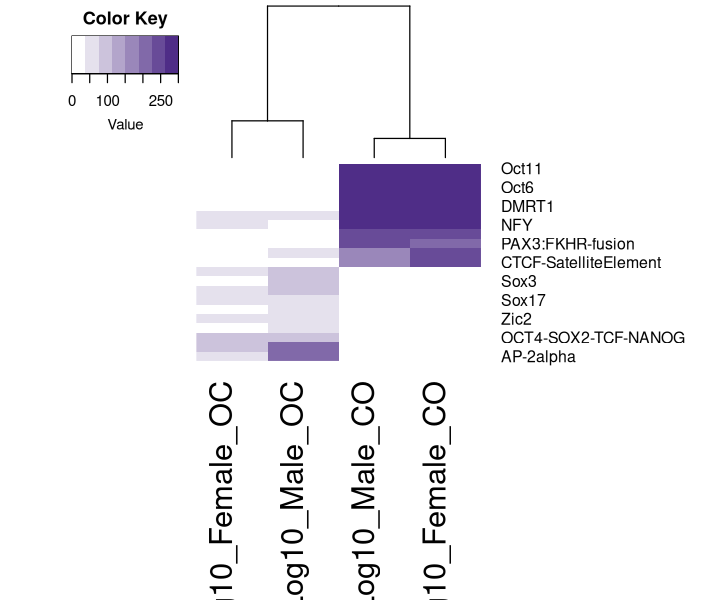

pdf 
  2

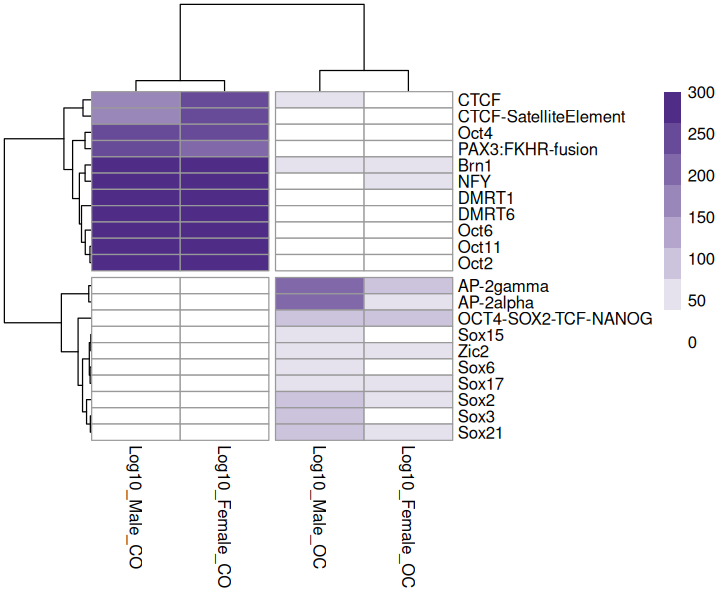

In [27]:
options(repr.plot.width = 6, repr.plot.height = 5)
my_palette <- colorRampPalette(c("white", "#4F2D87"))(n = 8)
heatmap.2(matrix, 
          trace = "none", 
          scale = "none", 
          col = my_palette, 
          density.info="none",
          margins =c(12,12),
          dendrogram = "col")

p1 <- pheatmap(matrix, scale = "none", color = my_palette, cluster_rows = T, cutree_cols = 2, cutree_rows = 2 )

pdf(file = 'Motif_Matrix_Top10.pdf', width = 6, height = 5)
p1
dev.off()

In [ ]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(xx, "test.pdf")
